In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
#set the location of the directory with data
directory = '/home/shenbaga/data-files/House_Prices/'

In [5]:
train = pd.read_csv(directory + 'train.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# clearly there are a lot of columns with missing values

In [7]:
test = pd.read_csv(directory + 'test.csv')

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [12]:
# drop a few columns that have very low data fill rate
#poor fill rate in train: Alley, FireplaceQu, PoolQC, Fence, MiscFeature
#poor fill rate in test: Alley, FireplaceQu, PoolQC, Fence, MiscFeature

In [18]:
train.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [19]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'GarageType',
       u'GarageYrBlt', u'GarageFinish', u'GarageCars', u'GarageArea',
  

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [21]:
test.drop(['Alley','FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [22]:
#concatenate the two dfs and encode object colums

In [23]:
ntrain = len(train)
ntest = len(test)

ntrain, ntest

(1460, 1459)

In [25]:
concat_df = pd.concat([train, test],axis = 0)
concat_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,1Fam,TA,No,706.0,0.0,GLQ,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,3,1Fam,TA,Gd,978.0,0.0,ALQ,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,3,1Fam,TA,Mn,486.0,0.0,GLQ,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,3,1Fam,Gd,No,216.0,0.0,ALQ,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,4,1Fam,TA,Av,655.0,0.0,GLQ,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [26]:
#encode object cols
for feature in concat_df.columns:
    if concat_df[feature].dtype == 'object':
        concat_df[feature] = pd.Categorical(concat_df[feature]).codes

In [27]:
concat_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,3,3,706.0,0.0,2,...,8,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,3,0,3,1,978.0,0.0,0,...,8,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,3,0,3,2,486.0,0.0,2,...,8,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,3,0,1,3,216.0,0.0,0,...,8,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,4,0,3,0,655.0,0.0,2,...,8,0,1,9,1145.0,0,192,2000,2000,2008


In [28]:
#split the concat back to train and test
final_train = concat_df[:ntrain]
final_test = concat_df[ntrain:]

In [29]:
len(final_train), len(final_test)

(1460, 1459)

In [30]:
final_test.columns

Index([u'1stFlrSF', u'2ndFlrSF', u'3SsnPorch', u'BedroomAbvGr', u'BldgType',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtFinType1', u'BsmtFinType2', u'BsmtFullBath', u'BsmtHalfBath',
       u'BsmtQual', u'BsmtUnfSF', u'CentralAir', u'Condition1', u'Condition2',
       u'Electrical', u'EnclosedPorch', u'ExterCond', u'ExterQual',
       u'Exterior1st', u'Exterior2nd', u'Fireplaces', u'Foundation',
       u'FullBath', u'Functional', u'GarageArea', u'GarageCars', u'GarageCond',
       u'GarageFinish', u'GarageQual', u'GarageType', u'GarageYrBlt',
       u'GrLivArea', u'HalfBath', u'Heating', u'HeatingQC', u'HouseStyle',
       u'Id', u'KitchenAbvGr', u'KitchenQual', u'LandContour', u'LandSlope',
       u'LotArea', u'LotConfig', u'LotFrontage', u'LotShape', u'LowQualFinSF',
       u'MSSubClass', u'MSZoning', u'MasVnrArea', u'MasVnrType', u'MiscVal',
       u'MoSold', u'Neighborhood', u'OpenPorchSF', u'OverallCond',
       u'OverallQual', u'PavedDrive', u'

In [31]:
final_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,0,3,3,468.0,144.0,4,...,8,120,1,5,882.0,0,140,1961,1961,2010
1,1329,0,0,3,0,3,3,923.0,0.0,0,...,8,0,1,6,1329.0,0,393,1958,1958,2010
2,928,701,0,3,0,3,3,791.0,0.0,2,...,8,0,1,6,928.0,0,212,1997,1998,2010
3,926,678,0,3,0,3,3,602.0,0.0,2,...,8,0,1,7,926.0,0,360,1998,1998,2010
4,1280,0,0,2,4,3,3,263.0,0.0,0,...,8,144,1,5,1280.0,0,0,1992,1992,2010


In [32]:
final_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,3,3,706.0,0.0,2,...,8,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,3,0,3,1,978.0,0.0,0,...,8,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,3,0,3,2,486.0,0.0,2,...,8,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,3,0,1,3,216.0,0.0,0,...,8,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,4,0,3,0,655.0,0.0,2,...,8,0,1,9,1145.0,0,192,2000,2000,2008


In [34]:
final_test[['SalePrice']].head()

,SalePrice
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [39]:
features = final_train.columns[:]

In [40]:
type(features)

pandas.indexes.base.Index

In [41]:
type(concat_df.columns)

pandas.indexes.base.Index

In [47]:
features = list(concat_df.columns.values)

In [48]:
type(features)

list

In [49]:
features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SalePrice',
 'SaleType',
 'ScreenPorch',

In [51]:
features.remove('SalePrice')

In [52]:
features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'ScreenPorch',
 'Street',
 '

In [53]:
y_train = final_train['SalePrice']

In [54]:
from xgboost.sklearn import XGBRegressor

In [55]:
xgb1 = XGBRegressor(
    learning_rate =0.01,
    n_estimators=1000,
    max_depth=12,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.5,
    nthread=4,
    scale_pos_weight=1,
    seed=2016,
    silent = 0,
    base_score = 7.76,
    reg_alpha = 1
)

In [65]:
xgb1_param = xgb1.get_params()

In [57]:
import xgboost as xgb

In [58]:
xgtrain1 = xgb.DMatrix(final_train[features], y_train)

In [59]:
import datetime

In [63]:
from time import time

In [66]:
print datetime.datetime.now()

start = time()

cvresult1 = xgb.cv(xgb1_param, 
                   xgtrain1,
                   num_boost_round=xgb1.get_params()['n_estimators'],
                   nfold = 5,
                   early_stopping_rounds = 50
                    )

end = time()

print ((end-start)/60.0)

2016-12-13 14:28:47.388370
2.09135483106


In [67]:
xgb1.set_params(n_estimators = cvresult1.shape[0])

XGBRegressor(base_score=7.76, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=2016, silent=0, subsample=0.8)

In [68]:
cvresult1.tail(5)

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
995,25795.191015,4482.769775,812.140759,65.450779
996,25795.004297,4482.854516,809.928979,65.418423
997,25794.696484,4482.616681,807.931482,65.609977
998,25794.366797,4482.819010,805.453662,65.210054
999,25794.195312,4482.776178,803.348120,65.082152


In [69]:
xgb1.fit(final_train[features], y_train)

XGBRegressor(base_score=7.76, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=2016, silent=0, subsample=0.8)

In [71]:
from sklearn import metrics

In [72]:
#Predict training set:
dtrain_predictions = xgb1.predict(final_train[features])
print "Accuracy : %.4g" % metrics.mean_squared_error(y_train, dtrain_predictions)

Accuracy : 7.181e+05


In [73]:
#predict the test values
submission = pd.read_csv(directory + 'sample_submission.csv')
submission.iloc[:, 1] = xgb1.predict(final_test[features])
submission.to_csv('Simple_XGB1_Test.csv', index=None)

In [74]:
#this submission on LB: 1122 ShenbagaKumarS 0.13270 Tue, 13 Dec 2016 09:12:31 

In [75]:
#try the same simple XGB with a log transform on the SalePrice

In [76]:
import seaborn as sns

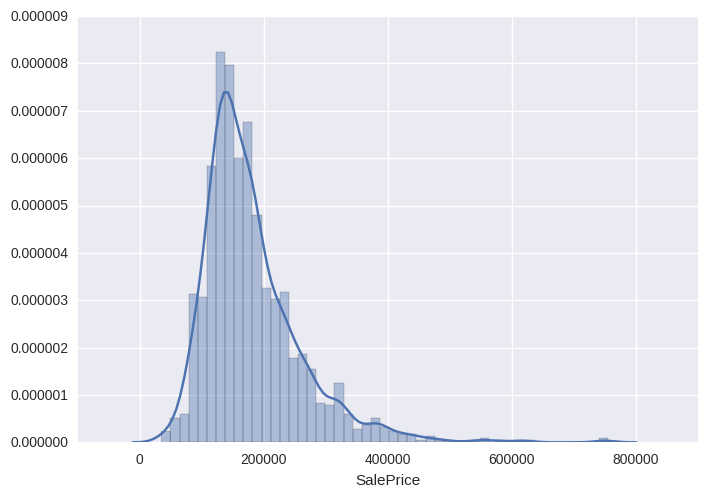

In [77]:
sns.distplot(y_train)

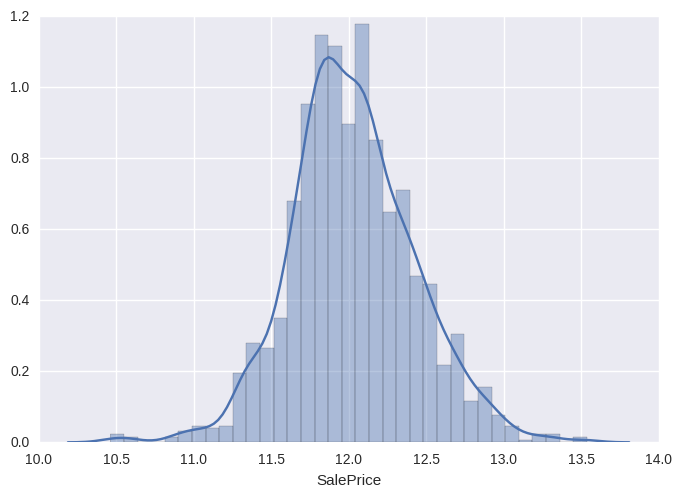

In [78]:
sns.distplot(np.log(y_train))

In [79]:
#the log transformed saleprice is more normal than simple saleprice

In [80]:
y_train = np.log(y_train)

In [81]:
xgb2 = XGBRegressor(
    learning_rate =0.01,
    n_estimators=1000,
    max_depth=12,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.5,
    nthread=4,
    scale_pos_weight=1,
    seed=2016,
    silent = 0,
    base_score = 7.76,
    reg_alpha = 1
)

In [82]:
xgb2_param = xgb2.get_params()

In [83]:
xgtrain2 = xgb.DMatrix(final_train[features], y_train)

In [84]:
print datetime.datetime.now()

start = time()

cvresult1 = xgb.cv(xgb2_param, 
                   xgtrain2,
                   num_boost_round=xgb2.get_params()['n_estimators'],
                   nfold = 5,
                   early_stopping_rounds = 50
                    )

end = time()

print ((end-start)/60.0)

2016-12-13 14:47:43.308126
1.74513246616


In [85]:
xgb2.set_params(n_estimators = cvresult1.shape[0])

XGBRegressor(base_score=7.76, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=2016, silent=0, subsample=0.8)

In [87]:
xgb2.fit(final_train[features], y_train)

XGBRegressor(base_score=7.76, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=2016, silent=0, subsample=0.8)

In [88]:
#Predict training set:
dtrain_predictions = xgb2.predict(final_train[features])
print "Accuracy : %.4g" % metrics.mean_squared_error(y_train, dtrain_predictions)

Accuracy : 0.003723


In [91]:
#predict the test values
submission2 = pd.read_csv(directory + 'sample_submission.csv')
submission2.iloc[:, 1] = np.exp(xgb2.predict(final_test[features]))
submission2.to_csv('Simple_XGB2_Test.csv', index=None)

In [92]:
#above  submission scored 0.13865

In [93]:
cvresult1.tail(10)

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
990,0.126386,0.017678,0.061271,0.001737
991,0.126377,0.017676,0.061238,0.001738
992,0.126376,0.017681,0.061209,0.001736
993,0.126367,0.017684,0.061179,0.001734
994,0.126357,0.017690,0.061145,0.001724
995,0.126348,0.017697,0.061112,0.001719
996,0.126346,0.017697,0.061081,0.001717
997,0.126335,0.017699,0.061053,0.001712
998,0.126327,0.017699,0.061020,0.001703
999,0.126321,0.017706,0.060985,0.001698


In [94]:
#the n_estimators = 1000 is not helping our case. we should increase it
#code from https://www.kaggle.com/humananalog/house-prices-advanced-regression-techniques/xgboost-lasso
#only the params for XGB from this code

In [95]:
regr1 = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

In [96]:
regr1.fit(final_train[features], y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.2,
       gamma=0.0, learning_rate=0.01, max_delta_step=0, max_depth=4,
       min_child_weight=1.5, missing=None, n_estimators=7200, nthread=-1,
       objective='reg:linear', reg_alpha=0.9, reg_lambda=0.6,
       scale_pos_weight=1, seed=42, silent=1, subsample=0.2)

In [102]:
dtrain_predictions = regr1.predict(final_train[features])
print "Accuracy : %.4g" % metrics.mean_squared_error(y_train, dtrain_predictions)

Accuracy : 0.005379


In [100]:
y_pred

array([ 204622.453125,  178345.734375,  212552.015625, ...,  255859.5625  ,
        138547.859375,  151746.390625], dtype=float32)

In [103]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [104]:
dtrain_predictions

array([ 12.22892189,  12.0914793 ,  12.26694202, ...,  12.452384  ,
        11.83897114,  11.92996597], dtype=float32)

In [117]:
print "Accuracy : %.4g" % metrics.mean_squared_error(np.exp(y_train), np.exp(dtrain_predictions))

Accuracy : 2.521e+08


In [105]:
print "Accuracy : %.4g" % metrics.mean_squared_error(final_train['SalePrice'], np.exp(dtrain_predictions))

Accuracy : 2.521e+08


In [118]:
print "Accuracy : %.4g" % metrics.mean_squared_error(np.exp(y_train), final_train['SalePrice'])

Accuracy : 1.018e-20


In [106]:
np.log([1,10,100])

array([ 0.        ,  2.30258509,  4.60517019])

In [107]:
np.log([1, np.e])

array([ 0.,  1.])

In [108]:
np.e

2.718281828459045

In [109]:
np.exp(2.71828)

15.154234532556728

In [119]:
#predict the test values
submission3 = pd.read_csv(directory + 'sample_submission.csv')
submission3.iloc[:, 1] = np.exp(regr1.predict(final_test[features]))
submission3.to_csv('Simple_Regr1_Test.csv', index=None)

In [120]:
#this simple regression scored best till date for me:
#850 	new 	 ShenbagaKumarS 	 0.12628 	3 	Tue, 13 Dec 2016 10:04:20 

In [121]:
xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.2,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.01,
    'objective': 'reg:linear',
    'max_depth': 12,
    'min_child_weight': 1.5,
    'booster': 'gbtree',
}

In [123]:
from sklearn.cross_validation import KFold

/home/shenbaga/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [127]:
import gc

In [131]:
#another try at XGB:
best_nrounds = 20000  # 640 score from above commented out code (Faron)
allpredictions = pd.DataFrame()
kfolds = 10  # 10 folds is better!
if kfolds > 1:
    kf = KFold(final_train.shape[0], n_folds=kfolds)
    for i, (train_index, test_index) in enumerate(kf):
        dtest = xgb.DMatrix(final_test[features])
        print('Fold {0}'.format(i + 1))
        X_train, X_val = final_train.iloc[train_index], final_train.iloc[test_index]
        #cols_ = [x for x in X_train.columns if 'loss' not in x][1:]
        dtrain = \
            xgb.DMatrix(X_train[features],
                        label=X_train.SalePrice)
        dvalid = \
            xgb.DMatrix(X_val[features],
                        label=X_val.SalePrice)
        watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

        gbdt = xgb.train(xgb_params, dtrain, best_nrounds, watchlist,
                         verbose_eval=50,
                         early_stopping_rounds=25)
        del dtrain
        del dvalid
        gc.collect()
        allpredictions['p' + str(i)] = \
            gbdt.predict(dtest, ntree_limit=gbdt.best_ntree_limit)
        del dtest
        del gbdt
        gc.collect()

Fold 1
[0]	train-rmse:196858	eval-rmse:185552
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 25 rounds.
[50]	train-rmse:124203	eval-rmse:115274
[100]	train-rmse:80206.6	eval-rmse:72859.5
[150]	train-rmse:53310.9	eval-rmse:48316.1
[200]	train-rmse:36495.8	eval-rmse:34085.8
[250]	train-rmse:25961.1	eval-rmse:26412.7
[300]	train-rmse:19146.8	eval-rmse:22638.2
[350]	train-rmse:14521.8	eval-rmse:20780
[400]	train-rmse:11384.7	eval-rmse:19921.7
[450]	train-rmse:9075.91	eval-rmse:19675.6
[500]	train-rmse:7484.14	eval-rmse:19459.3
[550]	train-rmse:6265.42	eval-rmse:19360.6
[600]	train-rmse:5374.04	eval-rmse:19287
Stopping. Best iteration:
[612]	train-rmse:5183.83	eval-rmse:19264.6

Fold 2
[0]	train-rmse:194934	eval-rmse:203153
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 25 rounds.
[50]	train-rmse:122942	eval-rmse:129381
[10

In [132]:
print(allpredictions.head())

              p0             p1             p2             p3             p4  \
0  122681.281250  125905.414062  126039.281250  121798.250000  122815.367188   
1  156236.781250  160374.312500  158290.781250  154428.906250  162108.984375   
2  180695.828125  180509.812500  181398.828125  177257.703125  187105.187500   
3  188826.203125  192362.406250  187448.828125  185784.203125  191009.046875   
4  188866.234375  183393.281250  185623.781250  182080.078125  186805.281250   

              p5             p6             p7             p8             p9  
0  126145.695312  125441.015625  124813.562500  124308.281250  123817.710938  
1  158384.593750  156956.796875  158185.875000  159457.531250  160369.406250  
2  179880.265625  183176.703125  185452.968750  182569.375000  181139.234375  
3  188363.500000  188499.375000  191847.046875  190342.203125  187190.250000  
4  187482.750000  183810.125000  184338.687500  184603.609375  186558.234375  


In [133]:
submission = pd.read_csv(directory + 'sample_submission.csv')
submission.iloc[:, 1] = allpredictions.mean(axis=1).values
submission.to_csv('xgbmeansubmission.csv', index=None)

In [134]:
#this submission scored 0.12981

In [135]:
#learn CV in XGB

In [136]:
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'reg:linear'}

In [141]:
num_round = 5

In [138]:
dtrain = xgb.DMatrix(final_train[features], final_train.SalePrice)

In [142]:
res = xgb.cv(param, dtrain, num_round, nfold=5,
       metrics={'error'}, seed = 0)

In [143]:
res

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,-180920.2,6797.554051,-180920.196875,1699.387815
1,-180920.2,6797.554051,-180920.196875,1699.387815
2,-180920.2,6797.554051,-180920.196875,1699.387815
3,-180920.2,6797.554051,-180920.196875,1699.387815
4,-180920.2,6797.554051,-180920.196875,1699.387815
